Trying to update the function `parse_ruptjson` to deal with a complex fault geometry file

In [2]:
import pandas as pd
import pygmt
import os
import math
import numpy as np
import argparse
from shapely.geometry import Point, LineString
from pathlib import Path
import xml.etree.ElementTree as ET

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth.
    Args:
        lat1, lon1: Latitude and longitude of point 1 in decimal degrees.
        lat2, lon2: Latitude and longitude of point 2 in decimal degrees.
    Returns:
        Distance in kilometers.
    """
    R = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def parse_ruptjson(file):
    """
    Parse a JSON file containing rupture data.
    Args:
        file: Path to the JSON file.
    Returns:
        x and y arrays of coordinates.
    """
    import json

    # Read the JSON file
    print(f"Parsing rupture geometry from {file}")
    with open(file, 'r') as f:
        data = json.load(f)
    # Navigate to the coordinates array
    coordinates = data["features"][0]["geometry"]["coordinates"]
    corners = coordinates[0][0]  # First polygon, first ring

    length = haversine(corners[0][1], corners[0][0], corners[1][1], corners[1][0])
    depth = corners[2][2] - corners[0][2]  
    # Extract the x and y coordinates from the corners
    x = [corners[0][0], corners[1][0], corners[2][0], corners[3][0], corners[4][0]]
    y = [corners[0][1], corners[1][1], corners[2][1], corners[3][1], corners[4][1]]
    print(f'length: {str(length)}')
    print(f'depth: {str(depth)}')
    return x, y

In [15]:
x,y = parse_ruptjson('/Users/hyin/shakemap_profiles/default/data/us6000jlqa/current_save/rupture.json')

y

Parsing rupture geometry from /Users/hyin/shakemap_profiles/default/data/us6000jlqa/current_save/rupture.json
length: 14.206298588153302
depth: 0.0


[37.9502, 38.0297, 38.0638, 38.0744, 38.0495]

In [ ]:
import json
import numpy as np

file = '/Users/hyin/shakemap_profiles/default/data/us6000jlqa/current_save/rupture.json'



# Read the JSON file
print(f"Parsing rupture geometry from {file}")
with open(file, 'r') as f:
    data = json.load(f)
# Navigate to the coordinates array
coordinates = data["features"][0]["geometry"]["coordinates"]
npoints = np.array(coordinates).shape[2]
print(f"Number of points in the rupture geometry: {npoints}")
nsegments = ((npoints - 1)/2)-1
print(f"Number of segments in the rupture geometry: {nsegments}")

corners = coordinates[0][0]  # First polygon, first ring

length = haversine(corners[0][1], corners[0][0], corners[1][1], corners[1][0])
depth = corners[2][2] - corners[0][2]  
# Extract the x and y coordinates from the corners
x = [corners[0][0], corners[1][0], corners[2][0], corners[3][0], corners[4][0]]
y = [corners[0][1], corners[1][1], corners[2][1], corners[3][1], corners[4][1]]
print(f'length: {str(length)}')
print(f'depth: {str(depth)}')

Parsing rupture geometry from /Users/hyin/shakemap_profiles/default/data/us6000jlqa/current_save/rupture.json
Number of points in the rupture geometry: 21
Number of segments in the rupture geometry: 9.0


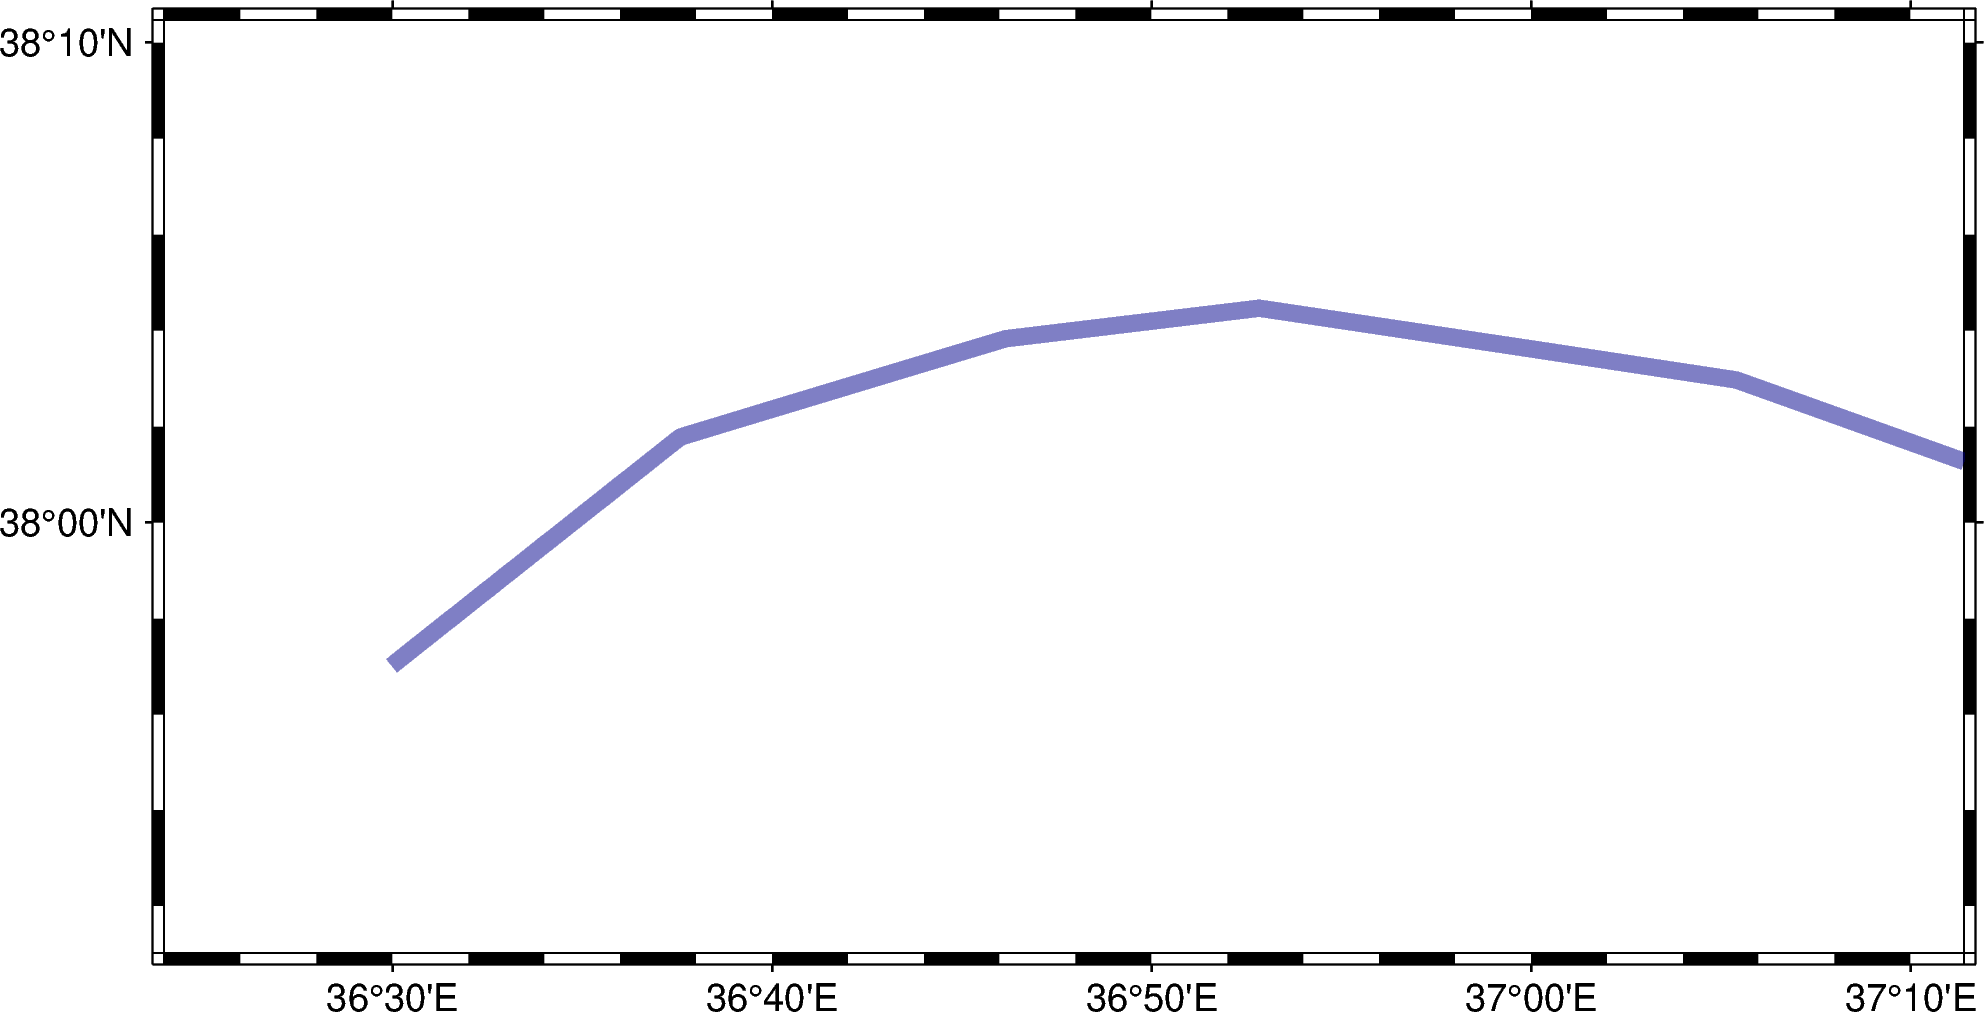

In [ ]:
import geopandas as gpd



import pygmt
fig = pygmt.Figure()
rgn = [min(x)-0.1, max(x)+0.1, min(y)-0.1, max(y)+0.1]
fig.basemap(region=rgn, projection="M6i", frame=True)
projection = "M6i"

gdf = gpd.read_file(file)

fig.plot(
    data=gdf,
    pen="4p,darkblue",
    transparency=50,
    region=rgn,
    projection=projection,
)
fig.show()
